In [1]:
import uproot
import matplotlib
import matplotlib.pyplot as plt
import awkward as ak
import hist
import numpy as np
from event_display import gdml_read_ecal_info
import os
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import crystalball, norm

%matplotlib inline
matplotlib.rc("figure", dpi=200)

dir_path = os.path.dirname(os.path.realpath("__file__"))
print(f"Believed path is: {dir_path}")

Believed path is: /home/romanov/eic/kak-bog-cherepahu/analysis


In [2]:
import pandas as pd

all_vals_df = pd.read_feather("/mnt/work/data/epi/2022-11-29_cherepaha_SciGlass-4-1-L_13x13_20x20x400mm_0.5-10GeV_e-pi-_20kev-each.feather")
all_vals_df["e_div_p"] = all_vals_df.de_sum/(all_vals_df.p*1000)
all_vals_df.head()

,p,prt_name,de_sum,towers,e_div_p
0,0.5,e-,493.520976,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.987042
1,0.5,e-,484.010113,"[0.0, 0.0, 0.0, 0.0, 0.1344369529403482, 1.108...",0.968020
2,0.5,e-,484.032912,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010...",0.968066
3,0.5,e-,491.080794,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.982162
4,0.5,e-,490.061738,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.980123


In [44]:
def make_2sigma_separation(e_df, pi_df):
    # Fit with crystalball and gauss
    cb_beta, cb_m, cb_loc, cb_scale = crystalball.fit(e_df.e_div_p, loc=0.6)
    norm_loc, norm_scale = norm.fit(e_df.e_div_p)
    print(cb_beta, cb_m, cb_loc, cb_scale)
    print(norm_loc, norm_scale)

    # where we separate
    separ_x = cb_loc - norm_scale*3
    n_pi_above_num = np.size(pi_df.query(f"e_div_p > {separ_x}").e_div_p)
    n_e_below_num = np.size(e_df.query(f"e_div_p <= {separ_x}").e_div_p)
    n_e_above_num = np.size(e_df.query(f"e_div_p > {separ_x}").e_div_p)

    n_pi_above = n_pi_above_num / np.size(pi_df.e_div_p)
    n_e_below = n_e_below_num / np.size(e_df.e_div_p)
    n_e_above = n_e_above_num / np.size(e_df.e_div_p)

    print(separ_x, n_pi_above, n_e_below, n_e_above, np.size(e_df.e_div_p))

    # We can set the number of bins with the *bins* keyword argument.
    fig, axs = plt.subplots()    
    axs.hist(e_df.e_div_p, bins=50, alpha = 0.5, edgecolor='blue', linewidth=0.3, range=(0, 1), density=True, label="$e^{-}$")
    axs.hist(pi_df.e_div_p, bins=50, alpha = 0.5, edgecolor='red', linewidth=0.3, range=(0, 1), density=True, label="$\pi^{-}$")
    axs.axvline(x=separ_x, color='red', linestyle='--', linewidth=0.8, label=f"peak-3$\sigma$ = {separ_x:.2f}")
    axs.plot([], [], ' ', label="$\epsilon_{e^{-}}$ = " + f"{n_e_above*100:.2f}%")
    axs.plot([], [], ' ', label="$\epsilon_{\pi^{-}}$ = " + f"{n_pi_above*100:.2f}%")
    axs.set_title(f"<E> = {e_df.p.mean():.1f} GeV")
    axs.legend(loc='best')
    
    # txt = ax.text(0.5, 0.5, f"{separ_x}\n {n_pi_above}, {n_e_below}, {n_e_above}")
    # txt.set_clip_on(False)
    # handles, labels = plt.get_legend_handles_labels()
    # handles.append(mpatches.Patch(color='none', label=extraString))
    # plt.legend(handles=handles)
    # # txt.set_clip_on(False)  # this will turn clipping off (always visible)
    # plt.plot()

def df_make_separation(df, e_center, range=1):
    e_min = e_center - 0.5*range
    e_max = e_center + 0.5*range
    e_filtered_df = all_vals_df.query(f"({e_min} < p < {e_max}) and prt_name=='e-'")
    pi_filtered_df = all_vals_df.query(f"({e_min} < p < {e_max}) and prt_name=='pi-'")

    make_2sigma_separation(e_filtered_df, pi_filtered_df)


0.3298712023569357 8.886430850994039 0.9832612857780652 0.005953497329146875
0.9673363946769472 0.029016460968454335
0.8962119028727021 0.07655 0.02155 0.97845 20000


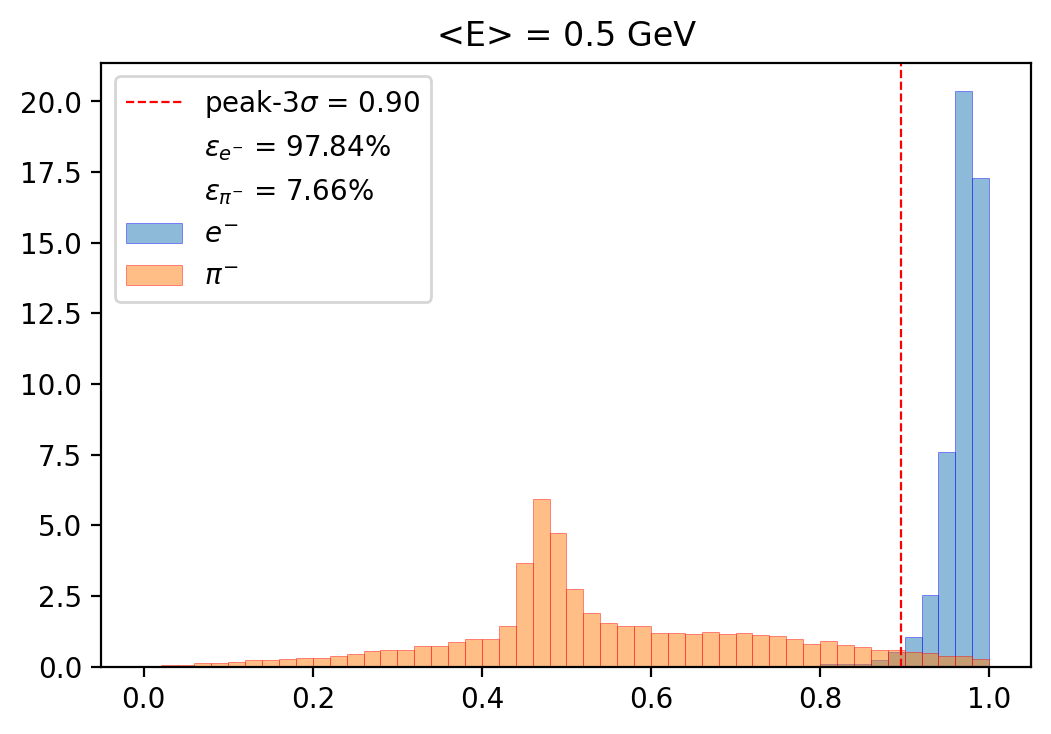

In [45]:
df_make_separation(all_vals_df, 0.5, 0.1)


0.43210248566439535 7.275467118646365 0.9791727595388026 0.00708501052849165
0.9653081905338214 0.029897054310784377
0.8894815966064494 0.0428 0.01815 0.98185 20000


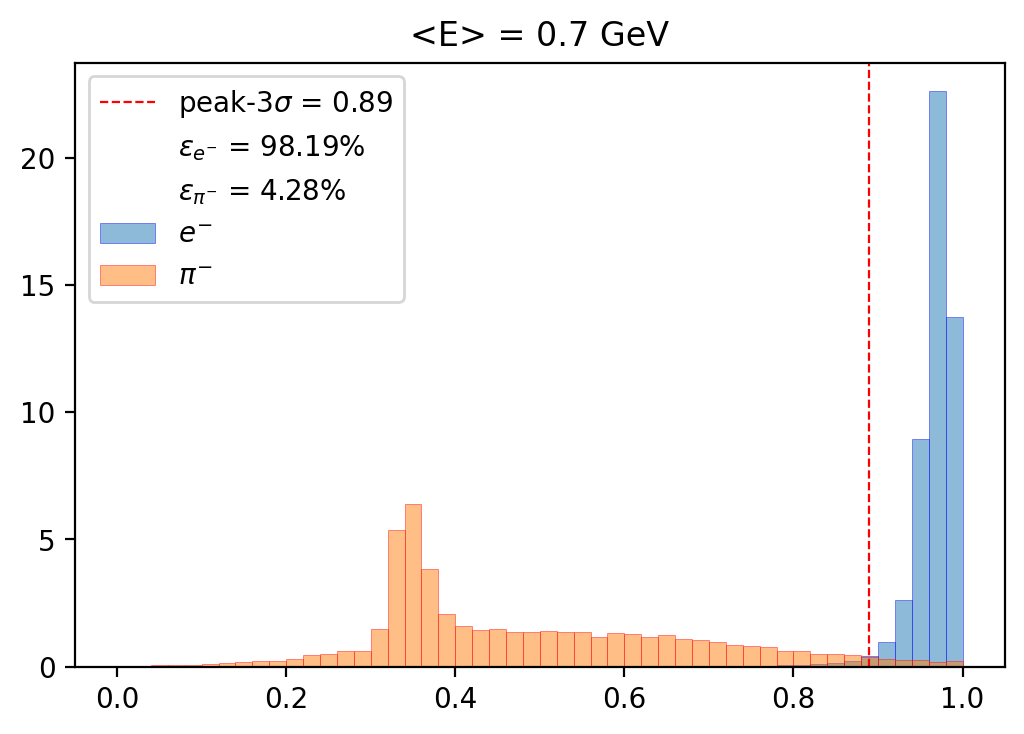

In [46]:
df_make_separation(all_vals_df, 0.7, 0.1)

0.4849724289682277 7.079998869898033 0.975372056388257 0.007638621308120107
0.9628269390392356 0.026832778102875758
0.8948737220796297 0.0146 0.0215 0.9785 20000


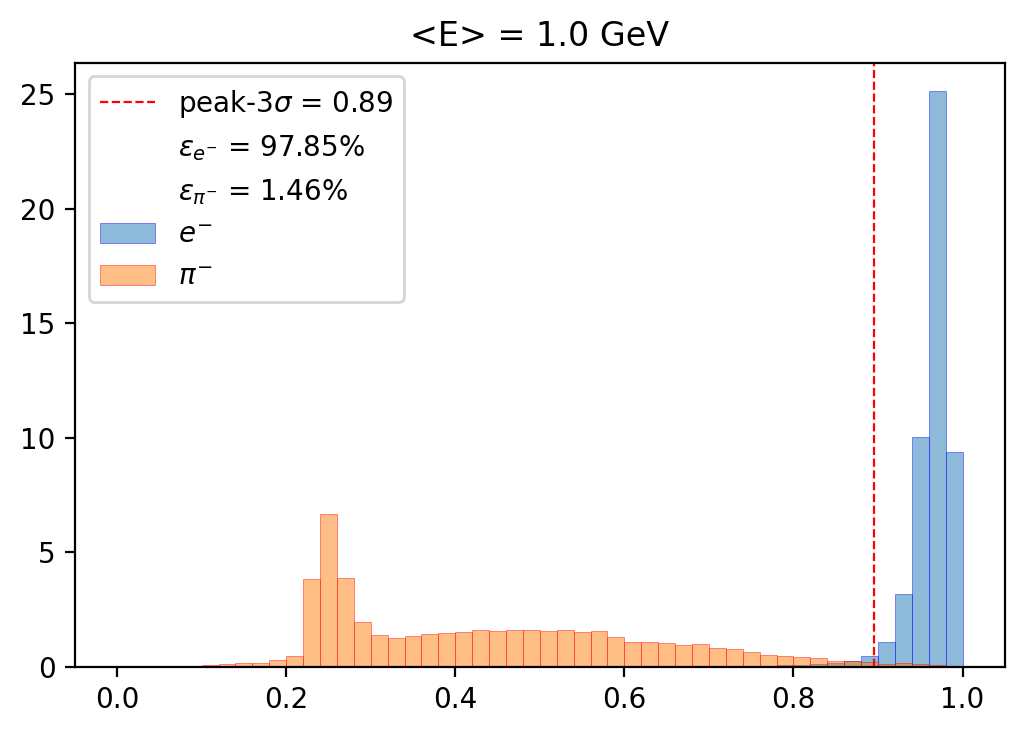

In [47]:
df_make_separation(all_vals_df, 1, 0.1)

0.5504905814183394 5.939950656479977 0.9688324884924523 0.0079742775969017
0.9571354697383638 0.027167864494047757
0.887328895010309 0.0036 0.02265 0.97735 20000


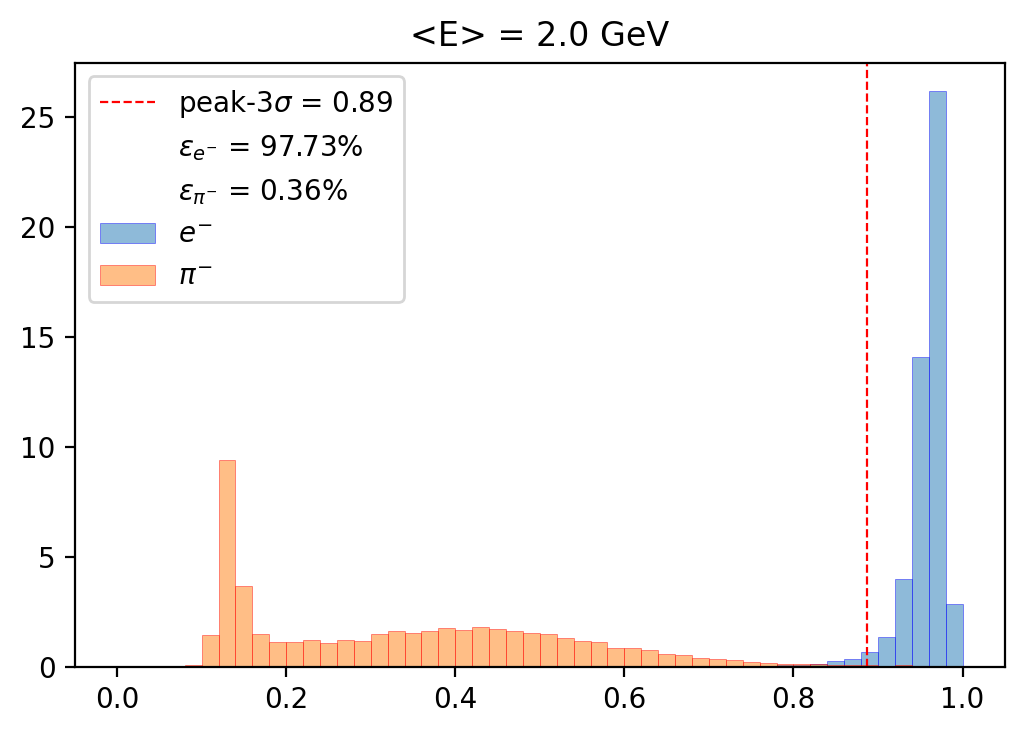

In [48]:
df_make_separation(all_vals_df, 2, 0.1)

0.4781707957955449 5.960719628855098 0.9598651585925171 0.00789885676257443
0.9453001857250016 0.0314007855644225
0.8656628018992496 0.0077 0.02185 0.97815 20000


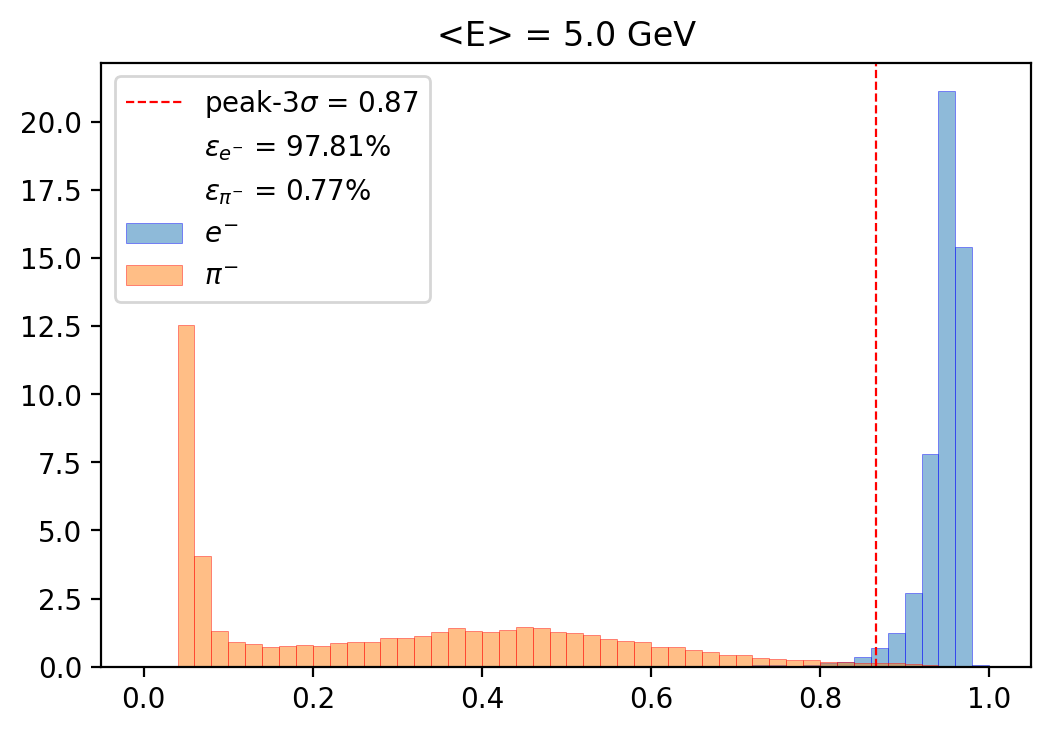

In [49]:
df_make_separation(all_vals_df, 5, 0.1)

0.4403266636210527 6.592335405550285 0.950606985170042 0.008854088816374499
0.9330987868682566 0.035148775625352166
0.8451606582939856 0.00795 0.0246 0.9754 20000


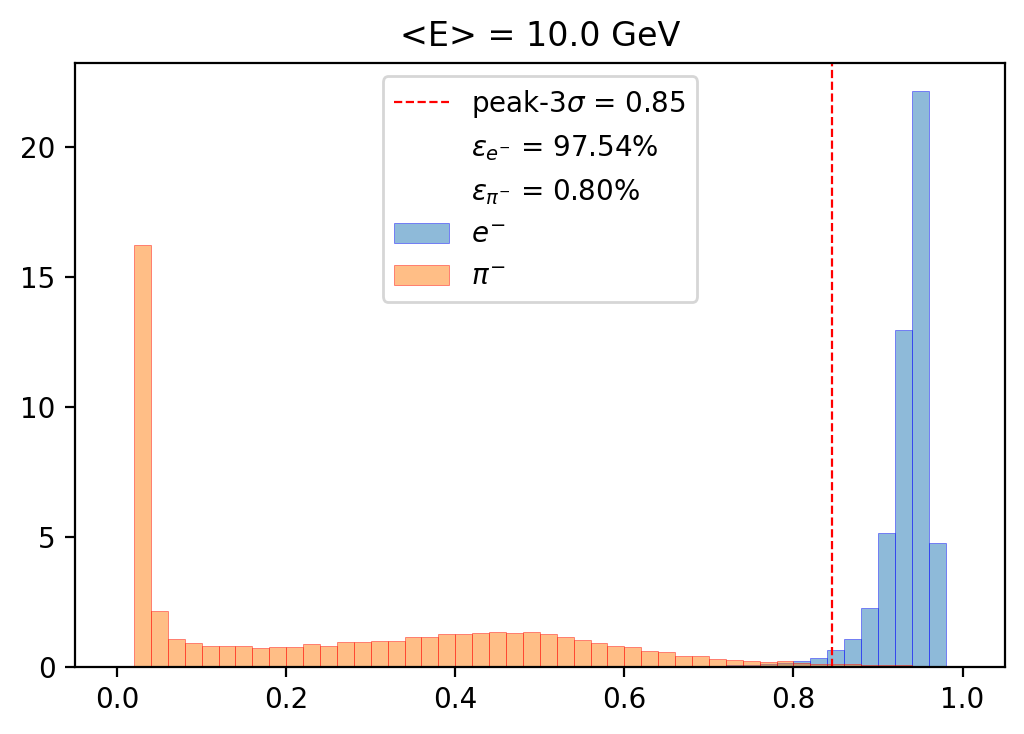

In [50]:
df_make_separation(all_vals_df, 10, 0.1)